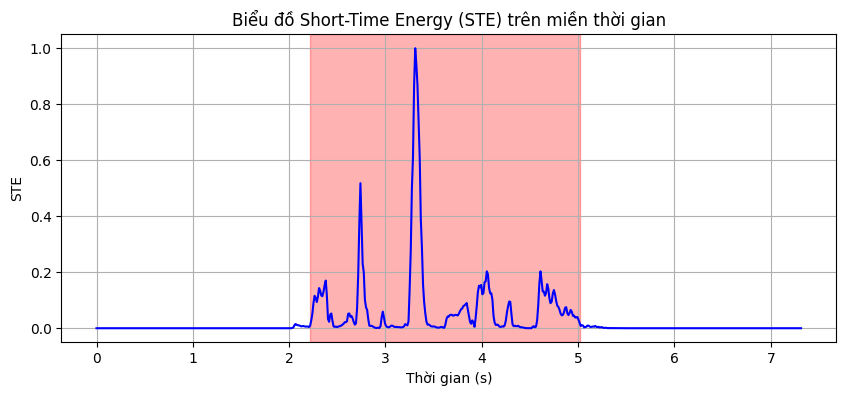

Thời gian bắt đầu: 2.22 s, Thời gian kết thúc: 5.02 s


In [5]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Đường dẫn đến file WAV
file_path = r"D:/data_analysis/speech_emotion_recognition/data/EnglishDataset/combined_data\Angry\03-01-05-01-01-01-02.wav"

# Hàm tính toán năng lượng theo thời gian ngắn (STE)
def calculate_ste(y, frame_size=256, hop_size=128):
    num_frames = len(y) - frame_size + hop_size
    num_frames = num_frames // hop_size
    ste = np.zeros(num_frames)

    for i in range(num_frames):
        start = i * hop_size
        end = start + frame_size
        ste[i] = np.sum(np.abs(y[start:end]) ** 2)

    return ste

# Hàm chuẩn hóa STE
def normalize_ste(ste):
    return ste / np.max(ste)

# Hàm tìm các điểm thay đổi đột ngột trong STE
def find_ste_changes(ste_values, threshold):
    derivatives = np.gradient(ste_values)
    increase = np.where(derivatives > threshold)[0]
    decrease = np.where(derivatives < -threshold)[0]
    if len(increase) > 0 and len(decrease) > 0:
        start = increase[0]
        end = decrease[-1]
        return start, end
    else:
        return None, None

# Đọc file âm thanh
y, sr = librosa.load(file_path)

# Tính toán STE
ste = calculate_ste(y, frame_size=256, hop_size=128)
ste = normalize_ste(ste)

# Tính toán các điểm thay đổi đột ngột
threshold = 0.01
start, end = find_ste_changes(ste, threshold)

# Tạo trục thời gian tương ứng
time = np.arange(0, len(ste)) * (256 / sr)  # Tính thời gian thực từ số frame

# Vẽ biểu đồ STE trên miền thời gian
plt.figure(figsize=(10, 4))
plt.plot(time, ste, color='b')
plt.xlabel('Thời gian (s)')
plt.ylabel('STE')
plt.title('Biểu đồ Short-Time Energy (STE) trên miền thời gian')

# Vạch các phần từ start đến end
if start is not None and end is not None:
    plt.axvspan(start * (256 / sr), end * (256 / sr), color='red', alpha=0.3)

plt.grid(True)
plt.show()

# Tính toán thời gian bắt đầu và kết thúc của đoạn thay đổi đột ngột
if start is not None and end is not None:
    start_time = start * (256 / sr)
    end_time = end * (256 / sr)
    print(f"Thời gian bắt đầu: {start_time:.2f} s, Thời gian kết thúc: {end_time:.2f} s")
else:
    print("Không tìm thấy sự thay đổi đột ngột trong STE.")


In [ ]:
import soundfile as sf
def save_audio_segment(segment, output_file_path, sr):
    """
    Lưu đoạn âm thanh vào tệp WAV.
    """
    print(output_file_path)
    sf.write(output_file_path, segment, sr)

start_sample = int(start_time * sr)
end_sample = int(end_time * sr)
cut_audio = y[start_sample:end_sample]
save_audio_segment(cut_audio, 'test.wav', sr)

test.wav
